# Cat vs Dog
#### NIERDING Axel 07/05/22
#### From Guillaumer Saint-Cirgue formation on deep learning


In [21]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
plt.style.use('dark_background')# For black background on plot
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
}) # For a gray dark color 

In [8]:
from utilities import * #Import function utilies from Guillaume Saint-Cirgue

## Load Data

In [9]:
X_train, y_train, X_test, y_test = load_data() #Load data

## See dimensions of data

In [10]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts = True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500]))


## See data 

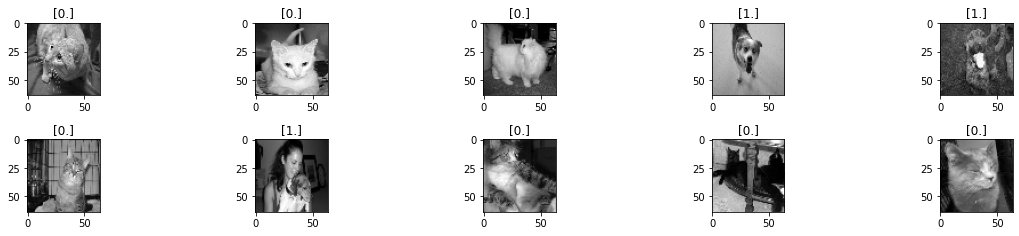

In [20]:
plt.figure(figsize=(16, 8))
for i in range(1, 11):
    plt.subplot(5, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()#Cute

## Functions for one neuron 
### From OneNeuron file

<img src="Pics/Model.png" width="400" height="400" />

In [12]:
#Initialisation

def initialisation (X):
    W = np.random.randn(X.shape[1], 1) #We shpae X matrix into vector
    b = np.random.randn(1) #b is a real number as the model below
    return (W , b)

#Model

def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

# Cost

def log_loss(A, y):
    epsilon = 1e-15
    return 1/len(y) * np.sum(-y * np.log(A + epsilon) - (1-y) * np.log(1 - A + epsilon)) 

# Gradients

def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return(dW, db)

# Update

def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return(W, b)

# Predict

def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5



In [13]:
from tqdm import tqdm #For time during learning

## One neuron

In [14]:
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate = 0.1, n_iter = 100):
    #initiation W, b
    W, b = initialisation(X_train)#The initilisation function

   
    train_Loss = []#Empty list which growth with learning
    train_acc = []#Empty list which growth with learning
    test_Loss = []#Empty list which growth with learning
    test_acc = []#Empty list which growth with learning

#Training
    for i in tqdm(range(n_iter)):# Learning loop (100 iterations here) with time
        
        # activation
        A = model(X_train, W, b)

        if i%10 == 0:
            #Train

            # calcul du cout
            train_Loss.append(log_loss(A, y_train))#Cost function

             # calcul de l'accuracy
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))


            #Test

            A_test = model(X_test, W, b)
            # Cost
            test_Loss.append(log_loss(A_test, y_test))#Cost function

             # Accuracy
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))

        # Update
        dW, db = gradients(A, X_train, y_train)#Descending gradients functions
        W, b = update(dW, db, W, b, learning_rate)#Update (W,b)


     
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)

    plt.plot(train_Loss, label='train loss')
    plt.plot(test_Loss, label='test loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='test acc')
    plt.show()#Display figures

    return (W,b)

## Normalise data 

In [15]:
X_train_reshape = X_train.reshape(X_train.shape[0], -1) / X_train.max ()
X_train_reshape.shape

(1000, 4096)

In [16]:
X_train_reshape.max()

1.0

In [17]:
X_test_reshape = X_test.reshape(X_test.shape[0], -1) / X_train.max()
X_test_reshape.shape

(200, 4096)

## Test and result

100%|██████████| 10000/10000 [00:23<00:00, 433.96it/s]


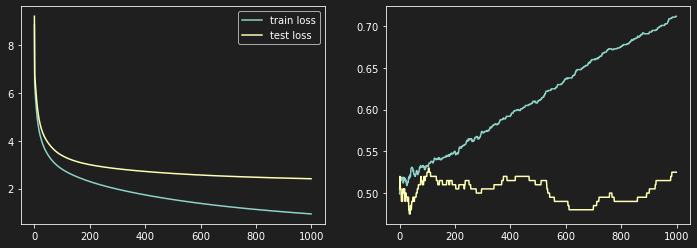

In [22]:
W, b = artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test, learning_rate= 0.01, n_iter=10000)

### The model is overfiting because only one neuron 